In [68]:
#spliting data

import numpy as np

data = open("data.txt", "r");
x = []
y = []
i = 0

for line in data:
    line = line.replace("\n", "")
    line = line.replace(",", ".")
    if (i % 2) == 0:
        
        x.append(float(line))
    else:
        y.append(float(line))
    i = i+1

In [69]:
#approximation with simple polynomial   

Aj = []
#A = np.array()
k = 0
j = 0
print(x)
print(y, "\n")
for k in range(i//2):
    for j in range(i//2):
        Aj.append(pow(x[k], j))
   
Ajn = np.array(Aj)
A = Ajn.reshape(21, 21)
b = np.array(y)

c = np.linalg.solve(A, b)
#print(A, "\n", "C = ", c)

print("polynomial vector: ", c[::-1]) 

c = c[::-1]
    
#print(A)
#print(y)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
[0.0, 0.000479, 0.006732, 0.026932, 0.058195, 0.074809, 0.030482, 0.120319, 0.387483, 0.712619, 0.958924, 0.939074, 0.48283, 0.472619, 1.802771, 3.16575, 4.052411, 3.922967, 2.403475, 0.515462, 4.352169] 

polynomial vector:  [ 1.03710204e+04 -9.43906978e+04 -1.53417006e+05  6.66926232e+06
 -4.88629676e+07  2.05642075e+08 -5.90809578e+08  1.24040579e+09
 -1.97006076e+09  2.41182981e+09 -2.29723928e+09  1.70655630e+09
 -9.85315275e+08  4.37948368e+08 -1.47364627e+08  3.65584666e+07
 -6.41539482e+06  7.44149101e+05 -5.03744563e+04  1.47474358e+03
  0.00000000e+00]


Polynomial of degree  21


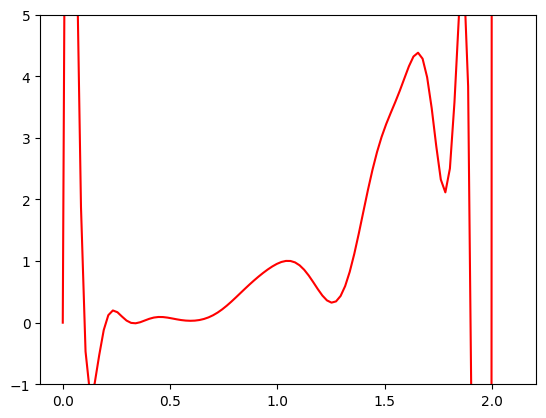

In [71]:
#plotting simple polynomial approximation

from matplotlib import pyplot as plt


lines = np.linspace(0, 2.1, 100)

cons = np.polyval(c, lines)
plt.ylim(-1, 5)
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
print("Polynomial of degree ", len(c))
plt.plot(lines, cons, '-r')
#ax.scatter(x=, f=y, c='r', label='Multiple Points')

In [58]:
#approximation with lowest sqaure method

n = 8
gram_vector = []
betta_vector = []
gamma = 0
betta = 0
#print(x)
for i in range(n+1):
    for j in range(n+1):
        for k in range (len(x)):
            gamma = gamma + pow(x[k], i) * pow(x[k], j)
        gram_vector.append(gamma)
        gamma = 0; 
        
for i in range(n+1):
    for k in range(len(x)):
        betta = betta + pow(x[k], i) * y[k]
    betta_vector.append(betta)
    betta = 0
        
#print(len(gram_vector))
#print(betta_vector)
b = np.array(betta_vector)
gram_vector = np.array(gram_vector)
G = gram_vector.reshape(n+1, n+1)

a = np.linalg.solve(G, b)
print(x)
print(y)
#print(G)
#print(b)

a = a[::-1]
print("Polinomial vector: ", a)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
[0.0, 0.000479, 0.006732, 0.026932, 0.058195, 0.074809, 0.030482, 0.120319, 0.387483, 0.712619, 0.958924, 0.939074, 0.48283, 0.472619, 1.802771, 3.16575, 4.052411, 3.922967, 2.403475, 0.515462, 4.352169]
Polinomial vector:  [ 8.34673490e+01 -6.18187451e+02  1.84139794e+03 -2.82461705e+03
  2.37086273e+03 -1.06442658e+03  2.30029847e+02 -1.78162708e+01
  7.27352822e-02]


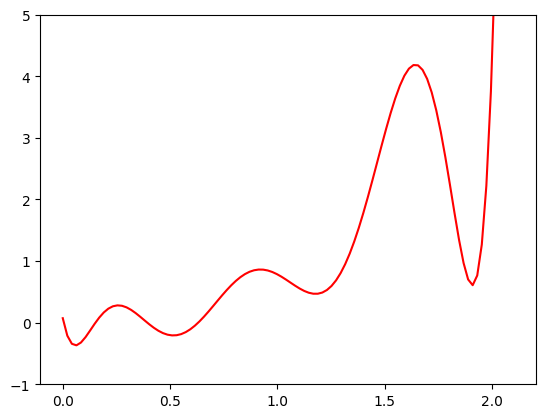

In [59]:
#plotting lowest sqaure method approximation

from matplotlib import pyplot as plt

lines = np.linspace(0, 2.1, 100)

cons = np.polyval(a, lines)
plt.ylim(-1, 5)

plt.plot(lines, cons, '-r')